In [1]:
import pandas as panda
import numpy as np
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = panda.read_csv("labeled_data.csv")
data

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


<AxesSubplot:>

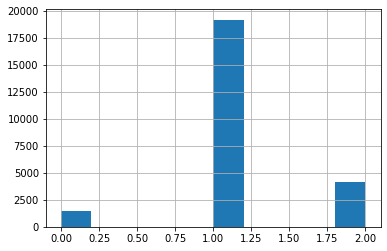

In [4]:
data['class'].hist()

In [5]:
tweet=data.tweet

In [6]:
def remove_space(tweet):  
    
    
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')    
    newtweet=tweet.str.replace(r'\s+', ' ')    
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')   
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    tweet_lower = newtweet.str.lower()
    
    return tweet_lower

In [7]:
tweets_space= remove_space(tweet)
data["tweets_w/o_space"]=tweets_space
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweets_w/o_space
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...


In [8]:
def remove_urls(tweet):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', tweet)

data["tweet_w/o_url"] = data["tweets_w/o_space"].apply(lambda tweet: remove_urls(tweet))

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vissh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer

data['tweet_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',tweet)) for tweet in lis]) 
                     for lis in data['tweet_w/o_url']]

In [11]:
data["tokenized_tweet"] = data["tweet_lem"].apply(lambda x: x.split())

In [12]:
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,rt mayasolovely as a woman you shouldn t...,"[rt, mayasolovely, as, a, woman, you, shouldn,..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,rt mleewnumbr boy dats cold tyga dwn...,"[rt, mleewnumbr, boy, dats, cold, tyga, dwn, b..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,rt urkindofbrand dawg rt numbrsb...,"[rt, urkindofbrand, dawg, rt, numbrsbabynumbrl..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,rt c g anderson viva based she lo...,"[rt, c, g, anderson, viva, based, she, look, l..."
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,rt shenikaroberts the shit you...,"[rt, shenikaroberts, the, shit, you, hear, abo..."


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vissh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

In [15]:
data["tweet_w/o_stop"] = data["tokenized_tweet"].apply(lambda x: [item for item in x if item not in stopwords])
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet,tweet_w/o_stop
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,rt mayasolovely as a woman you shouldn t...,"[rt, mayasolovely, as, a, woman, you, shouldn,...","[mayasolovely, woman, complain, cleaning, hous..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,rt mleewnumbr boy dats cold tyga dwn...,"[rt, mleewnumbr, boy, dats, cold, tyga, dwn, b...","[mleewnumbr, boy, dats, cold, tyga, dwn, bad, ..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,rt urkindofbrand dawg rt numbrsb...,"[rt, urkindofbrand, dawg, rt, numbrsbabynumbrl...","[urkindofbrand, dawg, numbrsbabynumbrlife, eve..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,rt c g anderson viva based she lo...,"[rt, c, g, anderson, viva, based, she, look, l...","[c, g, anderson, viva, based, look, like, tranny]"
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,rt shenikaroberts the shit you...,"[rt, shenikaroberts, the, shit, you, hear, abo...","[shenikaroberts, shit, hear, might, true, migh..."


In [16]:
processed_tweet = data["tweet_w/o_stop"].apply(lambda x: [stemmer.stem(i) for i in x]) 
    

In [17]:
 for i in range(len(processed_tweet)):
        processed_tweet[i] = ' '.join(processed_tweet[i])
        tweets_p= processed_tweet

In [18]:
data['processed_tweet'] = tweets_p

In [19]:
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet,tweet_w/o_stop,processed_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,rt mayasolovely as a woman you shouldn t...,"[rt, mayasolovely, as, a, woman, you, shouldn,...","[mayasolovely, woman, complain, cleaning, hous...",mayasolov woman complain clean hous amp man al...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,rt mleewnumbr boy dats cold tyga dwn...,"[rt, mleewnumbr, boy, dats, cold, tyga, dwn, b...","[mleewnumbr, boy, dats, cold, tyga, dwn, bad, ...",mleewnumbr boy dat cold tyga dwn bad cuffin da...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,rt urkindofbrand dawg rt numbrsb...,"[rt, urkindofbrand, dawg, rt, numbrsbabynumbrl...","[urkindofbrand, dawg, numbrsbabynumbrlife, eve...",urkindofbrand dawg numbrsbabynumbrlif ever fuc...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,rt c g anderson viva based she lo...,"[rt, c, g, anderson, viva, based, she, look, l...","[c, g, anderson, viva, based, look, like, tranny]",c g anderson viva base look like tranni
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,rt shenikaroberts the shit you...,"[rt, shenikaroberts, the, shit, you, hear, abo...","[shenikaroberts, shit, hear, might, true, migh...",shenikarobert shit hear might true might faker...


In [20]:
data.tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [21]:
data.processed_tweet

0        mayasolov woman complain clean hous amp man al...
1        mleewnumbr boy dat cold tyga dwn bad cuffin da...
2        urkindofbrand dawg numbrsbabynumbrlif ever fuc...
3                  c g anderson viva base look like tranni
4        shenikarobert shit hear might true might faker...
                               ...                        
24778    muthaf lie numbr lifeask numbr pearl corey ema...
24779      gone broke wrong heart babi drove redneck crazi
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl ntac eileen dahlia beauti color combin p...
Name: processed_tweet, Length: 24783, dtype: object

In [22]:
tweetstop = data['tweet_w/o_stop'] 

In [23]:
labels = data['class']

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

labels = encoder.fit_transform(np.array(labels).reshape(-1, 1))

In [25]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [26]:
data1 = []

for i in range(len(tweetstop)):
    data1.append(detokenize(tweetstop[i]))
print(data1[:5])

['mayasolovely woman complain cleaning house amp man always take trash', 'mleewnumbr boy dats cold tyga dwn bad cuffin dat hoe numbrst place', 'urkindofbrand dawg numbrsbabynumbrlife ever fuck bitch start cry confused shit', 'c g anderson viva based look like tranny', 'shenikaroberts shit hear might true might faker bitch told ya numbr']


In [27]:
data1 = np.array(data1)

In [28]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data1)
sequences = tokenizer.texts_to_sequences(data1)
tweets_in = pad_sequences(sequences, maxlen=max_len)
print(tweets_in)

[[   0    0    0 ...   83   76   15]
 [   0    0    0 ...    7  605  414]
 [   0    0    0 ...  470  900   12]
 ...
 [   0    0    0 ...   96   95  246]
 [   0    0    0 ...    3 1826 1247]
 [   0    0    0 ...   94   17   48]]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_in,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

18587 6196 18587 6196


In [30]:
model = Sequential()

model.add(layers.Embedding(max_words, 20))

model.add(layers.LSTM(15,dropout=0.5))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',
                             period=1,save_weights_only=False)

In [32]:
history1 = model.fit(X_train, y_train,steps_per_epoch=20,epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.9616 - accuracy: 0.7525
Epoch 00001: val_accuracy improved from -inf to 0.77469, saving model to best_model.hdf5
20/20 [==============================] - 9s 429ms/step - loss: 0.9616 - accuracy: 0.7525 - val_loss: 0.7381 - val_accuracy: 0.7747
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.7742
Epoch 00002: val_accuracy did not improve from 0.77469
20/20 [==============================] - 9s 460ms/step - loss: 0.6738 - accuracy: 0.7742 - val_loss: 0.6357 - val_accuracy: 0.7747
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6209 - accuracy: 0.7742
Epoch 00003: val_accuracy did not improve from 0.77469
20/20 [==============================] - 7s 367ms/step - loss: 0.6209 - accuracy: 0.7742 - val_loss: 0.5986 - val_accuracy: 0.7747
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.5600 - accuracy: 0.7743
Epoch 00004: val_accuracy improv

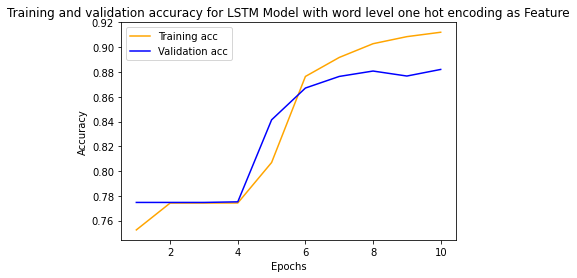

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with word level one hot encoding as Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

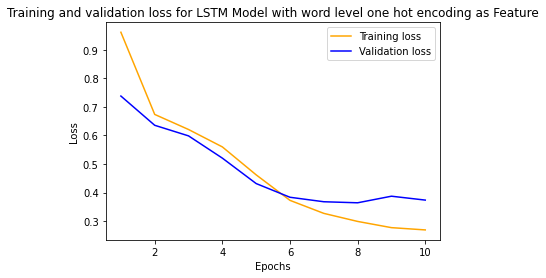

In [34]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with word level one hot encoding as Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(data['processed_tweet'] ).toarray()
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
tfidf.shape

(24783, 1000)

In [38]:
from sklearn.model_selection import train_test_split
X = tfidf
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, labels, random_state=42, test_size=0.2)

In [39]:
history2 = model.fit(X_train1, y_train1, steps_per_epoch=20, epochs=10,  validation_data=(X_test1, y_test1),
                     callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.7280 - accuracy: 0.7710
Epoch 00001: val_accuracy did not improve from 0.88202
20/20 [==============================] - 64s 3s/step - loss: 0.7280 - accuracy: 0.7710 - val_loss: 0.6751 - val_accuracy: 0.7730
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6696 - accuracy: 0.7746
Epoch 00002: val_accuracy did not improve from 0.88202
20/20 [==============================] - 63s 3s/step - loss: 0.6696 - accuracy: 0.7746 - val_loss: 0.6673 - val_accuracy: 0.7730
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6660 - accuracy: 0.7746
Epoch 00003: val_accuracy did not improve from 0.88202
20/20 [==============================] - 68s 3s/step - loss: 0.6660 - accuracy: 0.7746 - val_loss: 0.6651 - val_accuracy: 0.7730
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.6643 - accuracy: 0.7746
Epoch 00004: val_accuracy did not improve from 0.88202
20/20 [==========

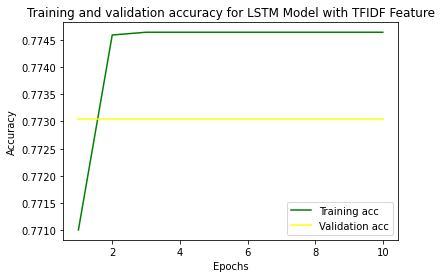

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'yellow', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with TFIDF Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

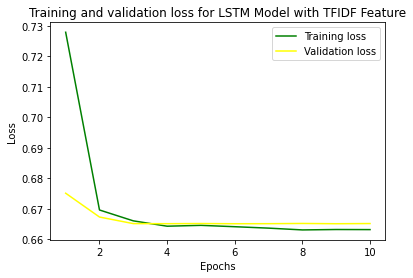

In [41]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with TFIDF Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
bow_vectorizer = CountVectorizer( max_features=100, stop_words='english', ngram_range=(2,2))
bagofwords=bow_vectorizer.fit_transform(data['processed_tweet'] ).toarray()
bagofwords

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
bagofwords.shape

(24783, 100)

In [44]:
X = bagofwords
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, labels, random_state=42, test_size=0.2)

In [45]:
history3 = model.fit(X_train2, y_train2, epochs=10, steps_per_epoch=20, validation_data=(X_test2, y_test2),
                     callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.6631 - accuracy: 0.7746
Epoch 00001: val_accuracy did not improve from 0.88202
20/20 [==============================] - 5s 251ms/step - loss: 0.6631 - accuracy: 0.7746 - val_loss: 0.6654 - val_accuracy: 0.7730
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6631 - accuracy: 0.7746
Epoch 00002: val_accuracy did not improve from 0.88202
20/20 [==============================] - 4s 217ms/step - loss: 0.6631 - accuracy: 0.7746 - val_loss: 0.6654 - val_accuracy: 0.7730
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6629 - accuracy: 0.7746
Epoch 00003: val_accuracy did not improve from 0.88202
20/20 [==============================] - 4s 213ms/step - loss: 0.6629 - accuracy: 0.7746 - val_loss: 0.6655 - val_accuracy: 0.7730
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.6629 - accuracy: 0.7746
Epoch 00004: val_accuracy did not improve from 0.88202
20/20 [====

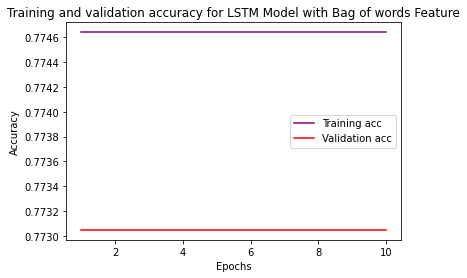

<Figure size 432x288 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with Bag of words Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

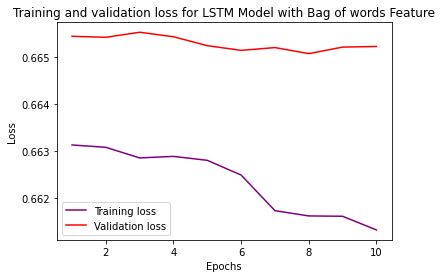

In [47]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with Bag of words Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
modelling_features = np.concatenate([tfidf,bagofwords,tweets_in],axis=1)
modelling_features.shape

(24783, 1300)

In [49]:
X = modelling_features
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, labels, random_state=42, test_size=0.2)

In [50]:
history4= model.fit(X_train3, y_train3, epochs=10, steps_per_epoch=20, validation_data=(X_test3, y_test3),
                    callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.3324 - accuracy: 0.8962
Epoch 00001: val_accuracy improved from 0.88202 to 0.90418, saving model to best_model.hdf5
20/20 [==============================] - 111s 6s/step - loss: 0.3324 - accuracy: 0.8962 - val_loss: 0.3003 - val_accuracy: 0.9042
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.2740 - accuracy: 0.9112
Epoch 00002: val_accuracy did not improve from 0.90418
20/20 [==============================] - 114s 6s/step - loss: 0.2740 - accuracy: 0.9112 - val_loss: 0.2939 - val_accuracy: 0.9034
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.9174
Epoch 00003: val_accuracy did not improve from 0.90418
20/20 [==============================] - 116s 6s/step - loss: 0.2502 - accuracy: 0.9174 - val_loss: 0.2961 - val_accuracy: 0.9036
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.9223
Epoch 00004: val_accuracy did no

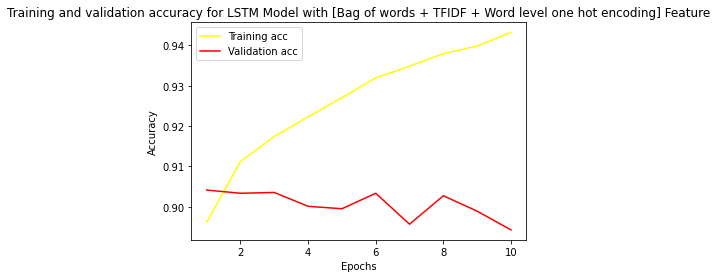

<Figure size 432x288 with 0 Axes>

In [51]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'yellow', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with [Bag of words + TFIDF + Word level one hot encoding] Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

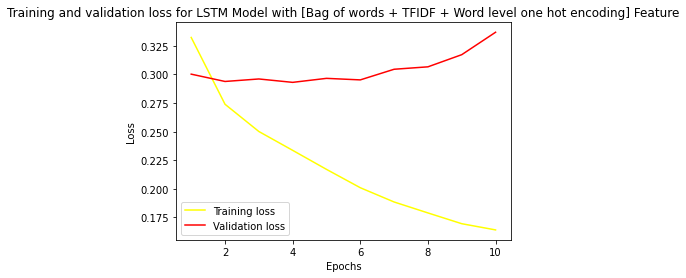

In [52]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'yellow', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with [Bag of words + TFIDF + Word level one hot encoding] Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.20353253185749054
Test accuracy: 0.9351194500923157


In [54]:
score2 = model.evaluate(X_test1, y_test1, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.6697127819061279
Test accuracy: 0.7730482220649719


In [55]:
score3 = model.evaluate(X_test2, y_test2, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.6697127819061279
Test accuracy: 0.7730482220649719


In [56]:
score4 = model.evaluate(X_test3, y_test3, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.6720296740531921
Test accuracy: 0.7730482220649719


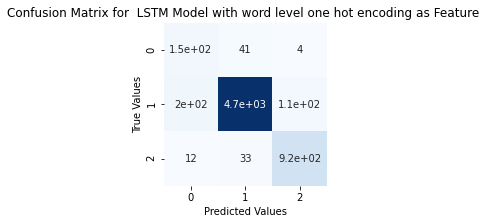

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig = plt.figure(figsize=(3, 3)) 

y_preds = model.predict(X_test) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for  LSTM Model with word level one hot encoding as Feature ')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

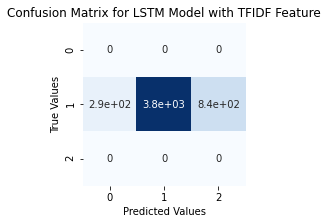

In [58]:
fig = plt.figure(figsize=(3, 3)) 

y_preds = model.predict(X_test1) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test1, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LSTM Model with TFIDF Feature')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

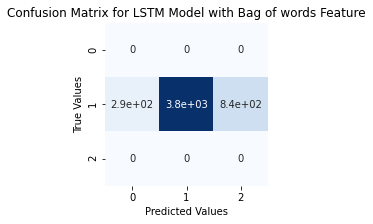

In [59]:
fig = plt.figure(figsize=(3, 3)) 

y_preds = model.predict(X_test2) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test2, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LSTM Model with Bag of words Feature')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

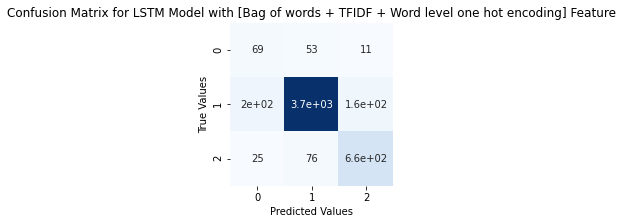

In [60]:
fig = plt.figure(figsize=(3, 3)) 

y_preds = model.predict(X_test3) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test3, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LSTM Model with [Bag of words + TFIDF + Word level one hot encoding] Feature')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 20)          100000    
_________________________________________________________________
lstm (LSTM)                  (None, 15)                2160      
_________________________________________________________________
flatten (Flatten)            (None, 15)                0         
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               8192      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 111,891
Trainable params: 111,891
Non-trainable params: 0
__________________________________________________

In [63]:
import keras
best_model = keras.models.load_model("best_model.hdf5")

In [64]:
sentiment = ['Hatespeech','Offensivelanguage','Neither']

In [65]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst , want my money back'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Hatespeech'

In [66]:
sequence = tokenizer.texts_to_sequences(['as a woman you should not complain about cleaning up your house'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Offensivelanguage'

In [67]:
sequence = tokenizer.texts_to_sequences(['When twitter rappers dm me their trash links'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Neither'

In [68]:
sequence = tokenizer.texts_to_sequences(['hi tweety bird'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Neither'

In [69]:
sequence = tokenizer.texts_to_sequences(['now u got what u want bitch '])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Offensivelanguage'

In [71]:
sequence = tokenizer.texts_to_sequences(['California is full of white trash'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Offensivelanguage'

In [73]:
sequence = tokenizer.texts_to_sequences(['Ariza is a coward'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Offensivelanguage'

In [76]:
score4 = model.evaluate(X_test3, y_test3, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.33693215250968933
Test accuracy: 0.8942909240722656
